In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## Загрузка и подготовка данных

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [7]:
data[data['reviews_per_month'].isna()]['number_of_reviews'].sum()

np.int64(0)

In [8]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
print(data.neighbourhood_group.unique())
print(data.room_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


## Базовые типы графиков для визуализации данных

### Scatter

#### Автоматическое назначение цветов в matplotlib

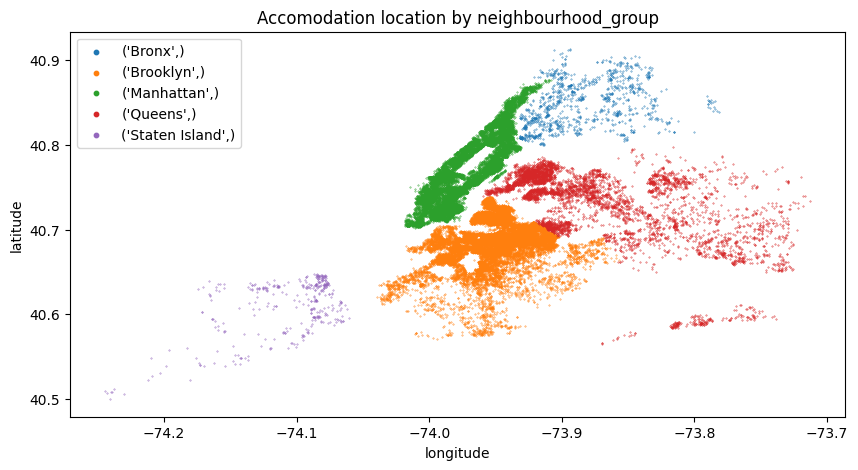

In [10]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(markerscale=10)
plt.title('Accomodation location by neighbourhood_group')
plt.show()

#### Явное задание цветов в matplotlib

In [11]:
colors = matplotlib.colors.get_named_colors_mapping()

In [12]:
list(colors.keys())[:5]

['xkcd:cloudy blue',
 'xkcd:dark pastel green',
 'xkcd:dust',
 'xkcd:electric lime',
 'xkcd:fresh green']

In [13]:
list(colors.values())[:5]

['#acc2d9', '#56ae57', '#b2996e', '#a8ff04', '#69d84f']

In [14]:
color_map = {
    'Brooklyn': colors['xkcd:cloudy blue'],
    'Manhattan': colors['xkcd:azul'],
    'Queens': colors['xkcd:electric lime'],
    'Staten Island': colors['xkcd:fresh green'],
    'Bronx': colors['xkcd:warm purple']
}

In [16]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, c=color_map[name], label=name)
plt.legend(markerscale=10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Accomodation location by neighbourhood_group')
plt.show()

KeyError: ('Bronx',)

<Figure size 1000x500 with 0 Axes>

### Bar, barh

In [17]:
room_type_size = data.groupby('room_type').size()

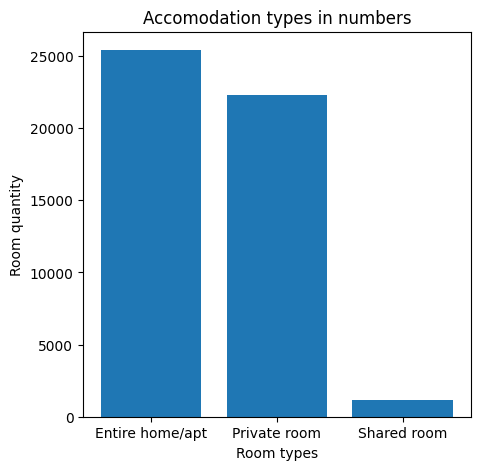

In [18]:
plt.figure(figsize=(5, 5))
plt.bar(room_type_size.index, room_type_size.values)
plt.xlabel('Room types')
plt.ylabel('Room quantity')
plt.title('Accomodation types in numbers')
plt.show()

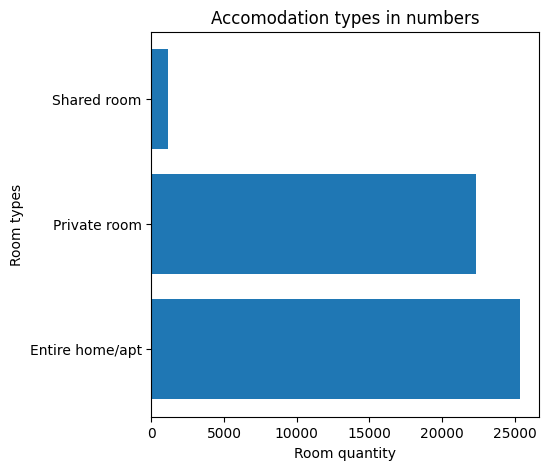

In [19]:
plt.figure(figsize=(5, 5))
plt.barh(room_type_size.index, room_type_size.values)
plt.xlabel('Room quantity')
plt.ylabel('Room types')
plt.title('Accomodation types in numbers')
plt.show()

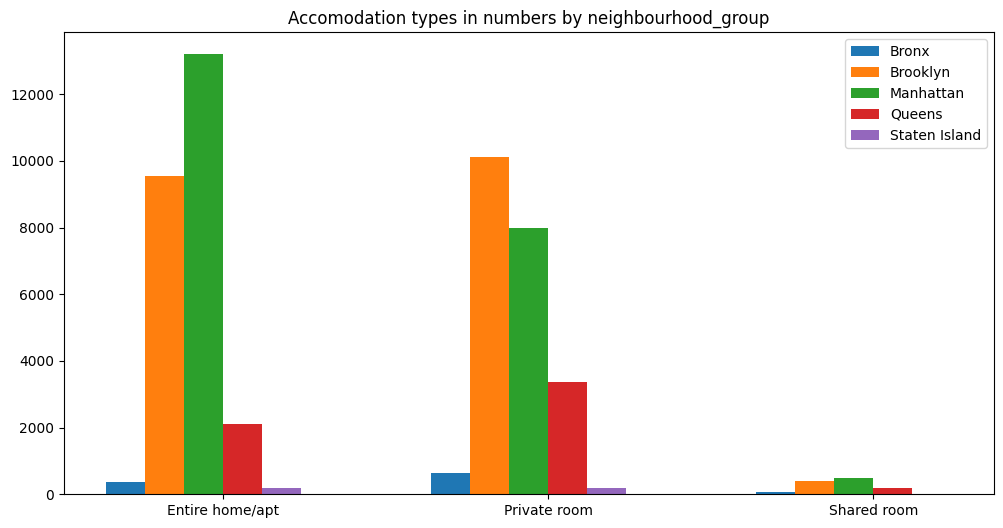

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Получаем все типы комнат
room_types = sorted(data['room_type'].unique())
neigh_groups = sorted(data['neighbourhood_group'].unique())

# 2. Создаём матрицу counts: строки — районы, столбцы — типы комнат
counts = (
    data.groupby(['neighbourhood_group', 'room_type'])
        .size()
        .unstack(fill_value=0)
        .reindex(neigh_groups)[room_types]
)

# 3. Рисуем grouped bar chart
plt.figure(figsize=(12, 6))

x = np.arange(len(room_types))
width = 0.12

for i, name in enumerate(neigh_groups):
    plt.bar(
        x + (i - len(neigh_groups)/2) * width,
        counts.loc[name].values,
        width,
        label=name
    )

plt.xticks(x, room_types)
plt.title("Accomodation types in numbers by neighbourhood_group")
plt.legend()
plt.show()


### Hist

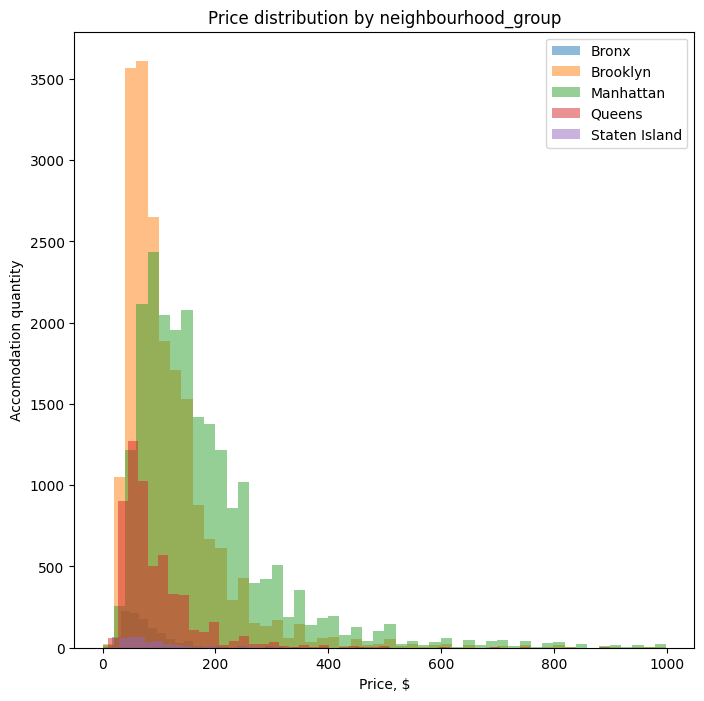

In [22]:
plt.figure(figsize=(8, 8))
filtered_data = data[data['price'] < 1000]
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.hist(group['price'], label=name, bins=50, alpha=0.5)
plt.xlabel('Price, $')
plt.ylabel('Accomodation quantity')
plt.title('Price distribution by neighbourhood_group')
plt.legend()
plt.show()

### Pie

In [23]:
neighbourhood_group_size = data.groupby(['neighbourhood_group']).size()

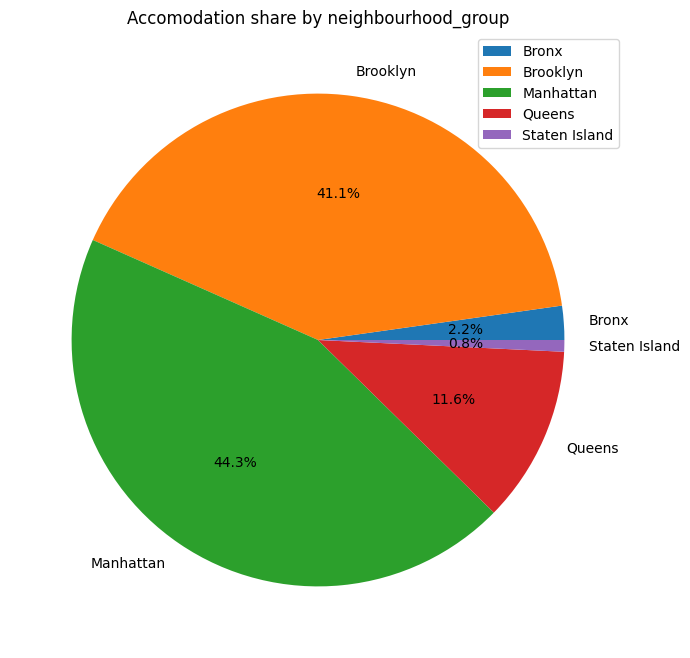

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_size.values, labels=neighbourhood_group_size.index, autopct='%1.1f%%')
plt.legend()
plt.title('Accomodation share by neighbourhood_group')
plt.show()

### Boxplot

  ![title](https://248006.selcdn.ru/public/email/courses/Профессия%20Data%20Scientist/boxplot.png)

In [25]:
filtered_data = data[data['price'] < 1000]

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_66770/4109708447.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['price'], positions=[index], labels=[name])
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_66770/4109708447.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['price'], positions=[index], labels=[name])
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_66770/4109708447.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group['price'], positions=[index], labels=[name])
/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipyker

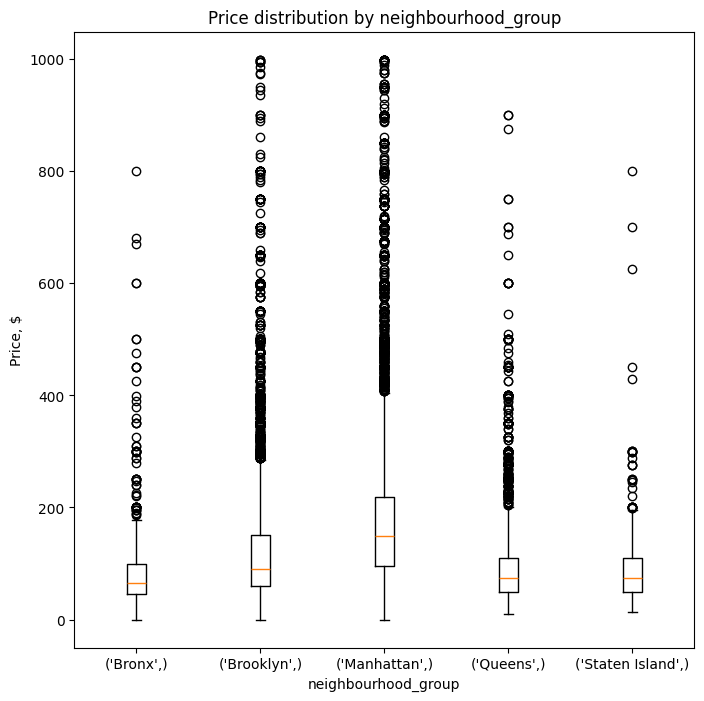

In [26]:
plt.figure(figsize=(8, 8))
index = 1
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.boxplot(group['price'], positions=[index], labels=[name])
    index += 1
plt.xlabel('neighbourhood_group')
plt.ylabel('Price, $')
plt.title('Price distribution by neighbourhood_group')
plt.show()

## Дополнительные материалы

[Основные функции, которые используются для отрисовки графиков разных видов](https://matplotlib.org/3.2.1/api/axes_api.html#plotting)

## Практическое задание

- C помощью первого способа и автоматической расстановки цвета постройте такой же график с помощью функции scatter, как на уроке, сгруппировав данные по колонке neighbourhood (мы использовали в примере neighbourhood_group).
- C помощью одного вызова функции scatter постройте точки по координатам, использовав при этом в качестве цвета колонку availability_365, для отображения соответствия цвета значения используйте функцию colorbar.
- Используйте пример из урока по функции bar и измените группировку: покажите количество жилья разных типов по административному округу (neighbourhood_group).
- Повторите то же самое, что делали на уроке с hist, для number_reviews.
- Используйте boxplot для визуализации распределения number_reviews по neighbourhood_group.